In [1]:
# %matplotlib widget
# Load packages and settings
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.min_rows', 50)
import seaborn as sns



import sys
sys.path.append("./../scripts")
import PandemiXFunctions as pf

import geopandas as gpd

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (12,8)
plt.rcParams["image.cmap"] = "tab10"
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=plt.cm.tab10.colors)
fs_label = 16
parameters = {
                'axes.labelsize': fs_label,
                'axes.titlesize': fs_label+4,
                'xtick.labelsize': fs_label,
                'ytick.labelsize': fs_label, 
                'legend.fontsize': fs_label, 
                'lines.markersize': 10,
                'lines.linewidth': 3
             }
plt.rcParams.update(parameters)
from matplotlib import cm # Colormaps
import matplotlib.colors as colors
# cmap = plt.cm.get_cmap('Dark2',len(ageGroups))

import locale
import matplotlib.dates as mdates
# locale.setlocale(locale.LC_TIME,"Danish")
# ax1.xaxis.set_major_formatter(mdates.DateFormatter('%b\n%Y'))
# ax1.spines['top'].set_visible(False) 

import os
# import csv
import math

# from datetime import date
import datetime


saveFigures = True
# saveFigures = False
print('saveFigures is set to: '+str(saveFigures))

print('Done loading packages')

saveFigures is set to: True
Done loading packages


In [2]:
# Define paths
rootdir_data = os.getcwd() +"/../DanskeData/" 

path_data = rootdir_data + "ssi_data/"
path_dash = rootdir_data + "ssi_dashboard/"
path_vacc = rootdir_data + "ssi_vacc/"

path_figs = os.getcwd() +"/../Figures/" 

In [96]:
# Get data
latestsubdir = list(os.walk(path_dash))[0][1][-1]
latestdir = path_dash + latestsubdir


dfReinfFile = pd.read_csv(latestdir+'/Regionalt_DB/24_reinfektioner_daglig_region.csv',encoding='latin1',delimiter = ';')
dfReinfFile['Prøvedato'] = pd.to_datetime(dfReinfFile['Prøvedato'])
dfReinfFile = dfReinfFile.rename(columns={'Prøvedato':'Dato'})

# df_reinf = dfReinfFile[dfReinfFile['Type af tilfælde (reinfektion eller første infektion)'] == '1.Reinfektion'].groupby('Prøvedato').sum()
# df_inf = dfReinfFile[dfReinfFile['Type af tilfælde (reinfektion eller første infektion)'] != '1.Reinfektion'].groupby('Prøvedato').sum()
# dfKey = pd.read_csv(latestdir+'/Regionalt_DB/03_bekraeftede_tilfaelde_doede_indlagte_pr_dag_pr_koen.csv',encoding='latin1',delimiter=';')

dfAdm = pd.read_csv(latestdir+'/Regionalt_DB/15_indlagte_pr_region_pr_dag.csv',encoding='latin1',delimiter=';')

dfAdm['Dato'] = pd.to_datetime(dfAdm['Dato'])

# print(dfAdm.Region.unique())
allRegions = dfAdm.Region.unique()
print(dfAdm.columns)

Index(['Dato', 'Region', 'Indlagte', 'Indlagte på intensiv',
       'Indlagte i respirator', 'Indlagte i psykiatrien'],
      dtype='object')


In [97]:
dfCaseGr = dfReinfFile.groupby(['Region','Dato']).sum()
dfGr = dfAdm.groupby(['Region','Dato']).sum()

In [99]:
# dfGr['Hovedstaden']
# dfGr['Indlagte']
# dfGr.index.get_level_values('Region')
# dfGr["Region"]
# # dfGr.columns
# curdf = dfGr.loc['Hovedstaden']

# curDates = curdf.index 
# rnDays = pf.rnTime(curDates)
# dfCaseGr

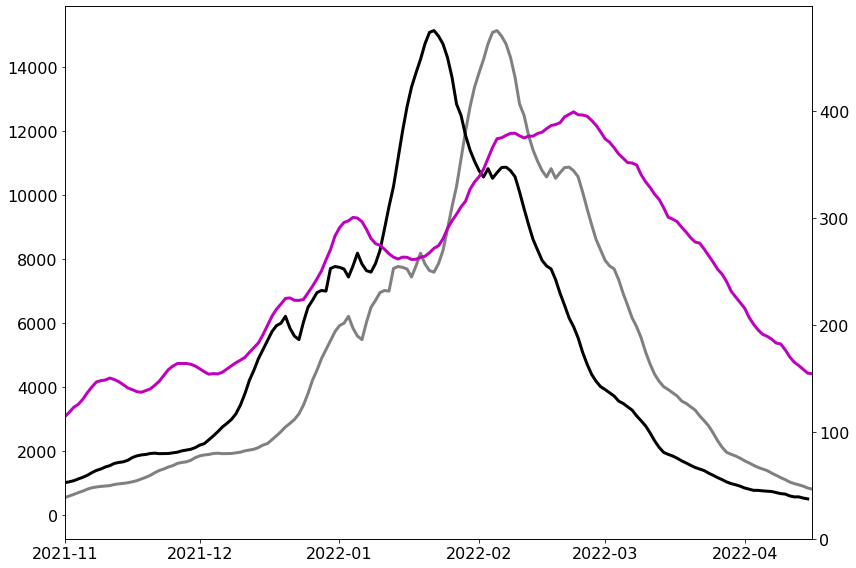

In [118]:
curRegion = 'Hovedstaden'
curdfAdm = dfGr.loc[curRegion]
curdfCase = dfCaseGr.loc[curRegion]

curDates = curdfAdm.index 
rnDays = pf.rnTime(curDates)

fig,ax = plt.subplots()


ax.plot(pf.rnTime(curdfCase.index)+np.timedelta64(14,'D'),pf.rnMean(curdfCase.infected),'grey')
ax.plot(pf.rnTime(curdfCase.index),pf.rnMean(curdfCase.infected),'k')

ax2 = ax.twinx()

admTot = curdfAdm.Indlagte
admPsyk = curdfAdm['Indlagte i psykiatrien']
admNonPsyk = admTot - admPsyk

ax2.plot(rnDays,pf.rnMean(admNonPsyk),'m')
# ax2.plot(rnDays,pf.rnMean(admTot),'r')
# ax2.plot(rnDays,pf.rnMean(admPsyk),'g')

ax2.set_xlim(left=np.datetime64('2021-11-01'),right=rnDays[-1])
ax2.set_ylim(bottom=0)
# ax3.set_ylim(bottom=0)
fig.tight_layout()



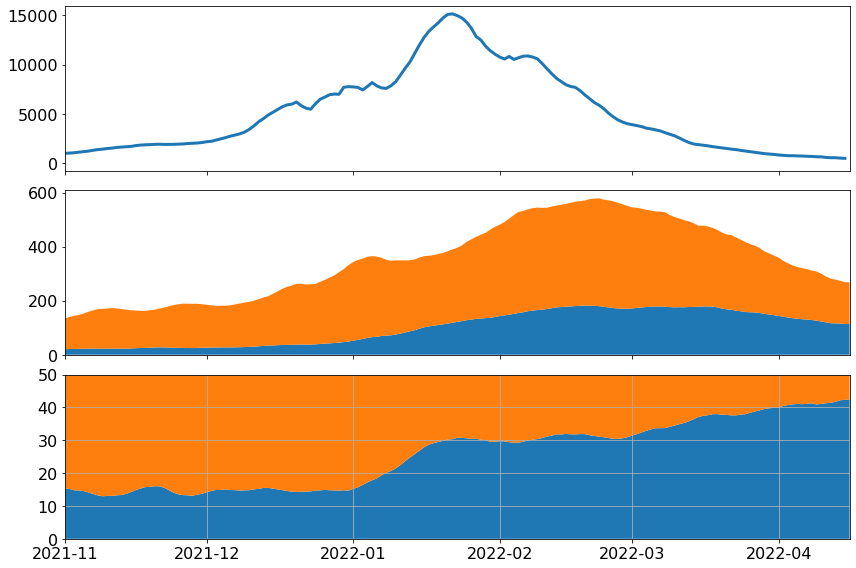

In [102]:
curRegion = 'Hovedstaden'
curdfAdm = dfGr.loc[curRegion]
curdfCase = dfCaseGr.loc[curRegion]

curDates = curdfAdm.index 
rnDays = pf.rnTime(curDates)

fig,(ax3,ax,ax2) = plt.subplots(3,1,sharex=True)


ax3.plot(pf.rnTime(curdfCase.index),pf.rnMean(curdfCase.infected))

admTot = curdfAdm.Indlagte
admPsyk = curdfAdm['Indlagte i psykiatrien']
admNonPsyk = admTot - admPsyk

# ax.stackplot(curDates,
#     admNonPsyk,
#     admPsyk
#     )
ax.stackplot(rnDays,
    pf.rnMean(admPsyk),
    pf.rnMean(admNonPsyk),
    )
# ax.plot(rnDays,pf.rnMean(curdfAdm['Indlagte på intensiv']))
# ax.plot(rnDays,pf.rnMean(curdfAdm['Indlagte i respirator']))


ax2.stackplot(rnDays,
    100*pf.rnMean(admPsyk)/pf.rnMean(admTot),
    100*pf.rnMean(admNonPsyk)/pf.rnMean(admTot),
    )

ax.set_xlim(left=np.datetime64('2021-11-01'),right=rnDays[-1])
ax.set_ylim(bottom=0)
ax2.set_ylim([0,100])
ax2.set_ylim(top=50)

ax2.grid()

fig.tight_layout()



C:\Users\Rasmus\AppData\Local\Temp/ipykernel_15260/3581324832.py:27: RuntimeWarning: invalid value encountered in true_divide
  100*pf.rnMean(admPsyk)/pf.rnMean(admTot),
C:\Users\Rasmus\AppData\Local\Temp/ipykernel_15260/3581324832.py:28: RuntimeWarning: invalid value encountered in true_divide
  100*pf.rnMean(admNonPsyk)/pf.rnMean(admTot),
C:\Users\Rasmus\AppData\Local\Temp/ipykernel_15260/3581324832.py:27: RuntimeWarning: invalid value encountered in true_divide
  100*pf.rnMean(admPsyk)/pf.rnMean(admTot),
C:\Users\Rasmus\AppData\Local\Temp/ipykernel_15260/3581324832.py:28: RuntimeWarning: invalid value encountered in true_divide
  100*pf.rnMean(admNonPsyk)/pf.rnMean(admTot),
C:\Users\Rasmus\AppData\Local\Temp/ipykernel_15260/3581324832.py:27: RuntimeWarning: invalid value encountered in true_divide
  100*pf.rnMean(admPsyk)/pf.rnMean(admTot),
C:\Users\Rasmus\AppData\Local\Temp/ipykernel_15260/3581324832.py:28: RuntimeWarning: invalid value encountered in true_divide
  100*pf.rnMean(ad

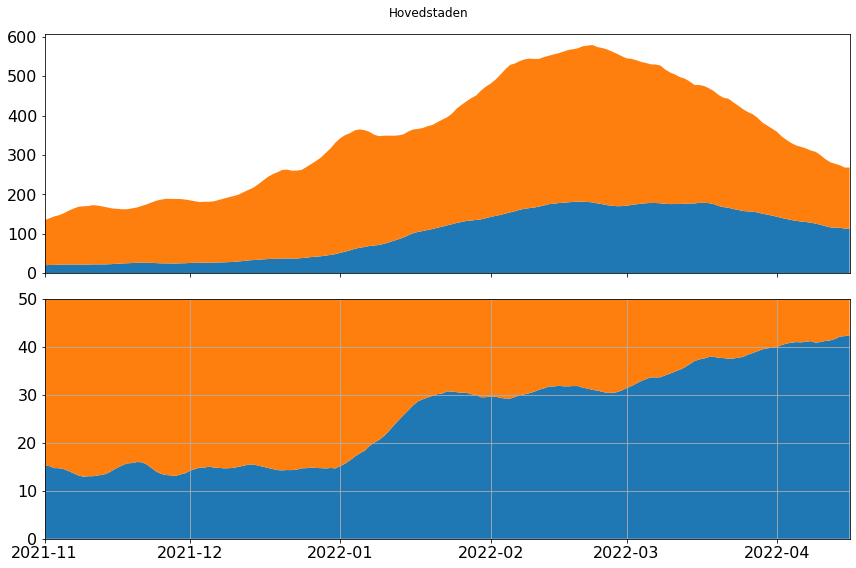

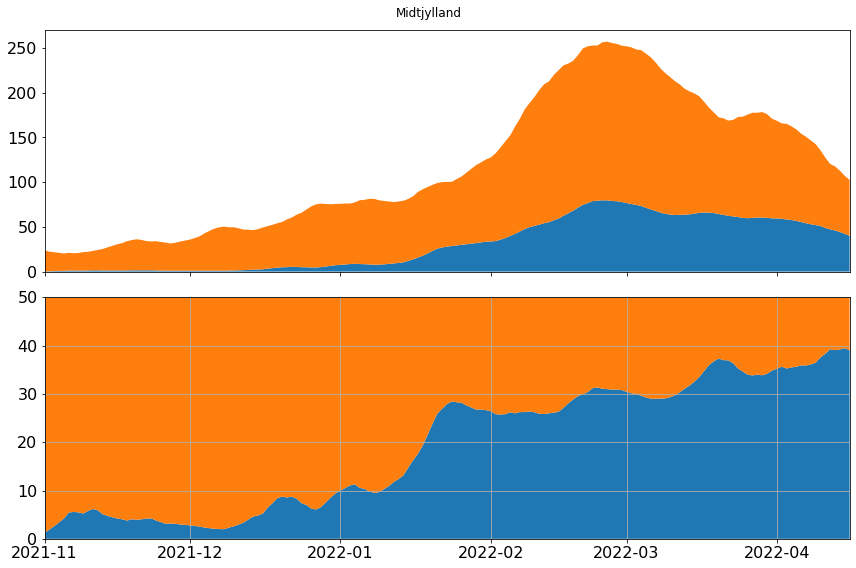

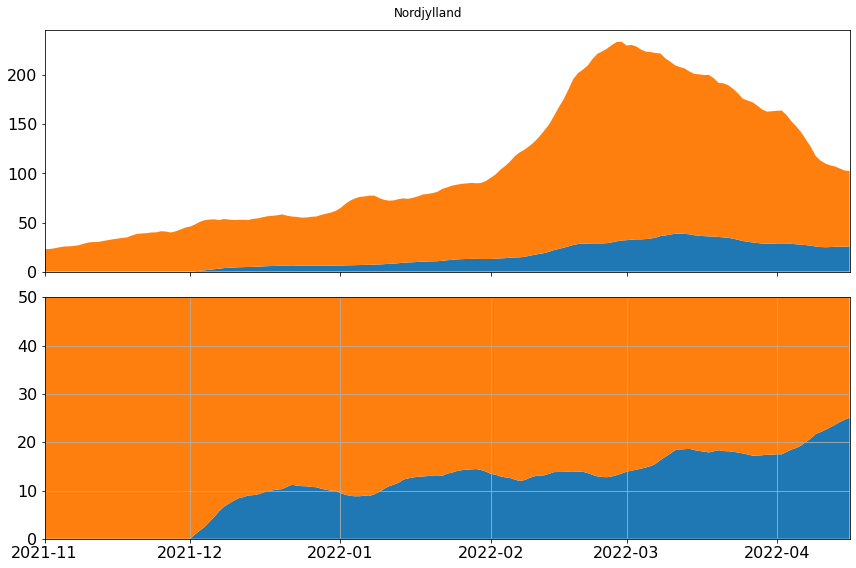

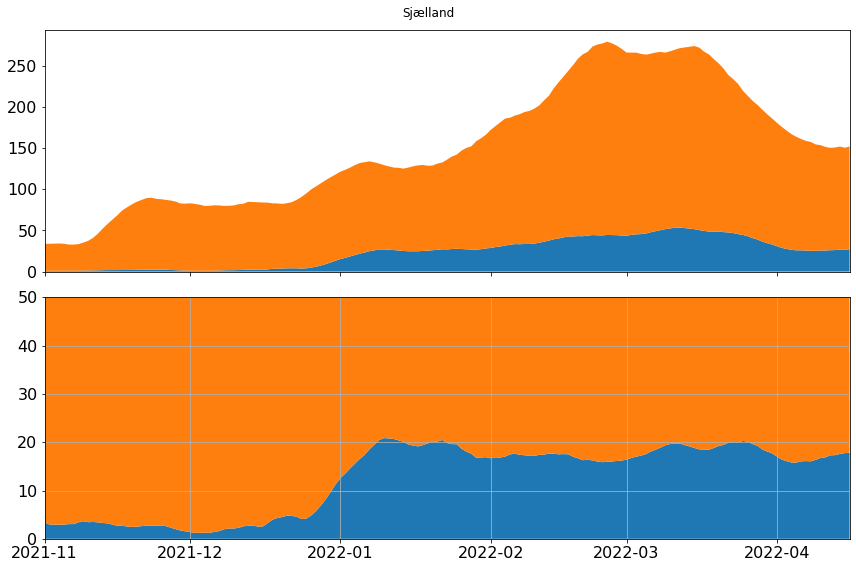

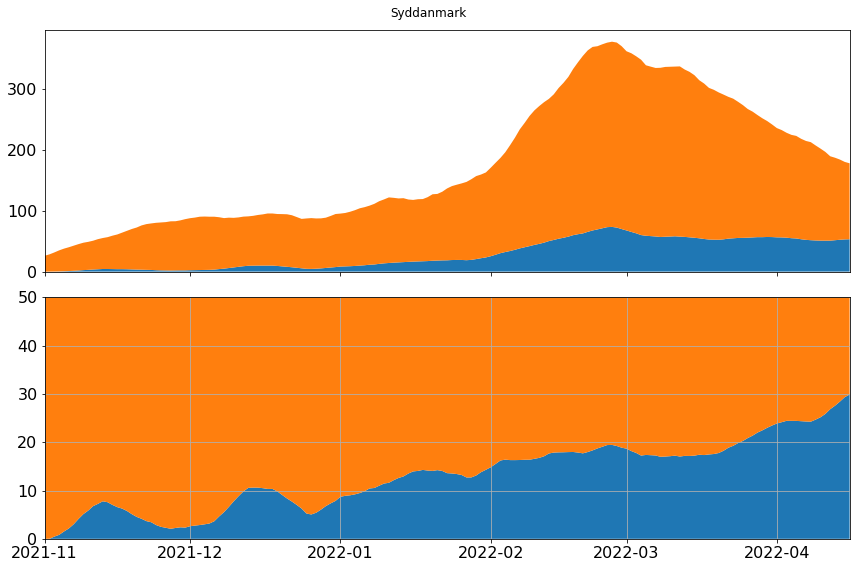

In [75]:
for curRegion in dfAdm.Region.unique():

    curdf = dfGr.loc[curRegion]

    curDates = curdf.index 
    rnDays = pf.rnTime(curDates)

    fig,(ax,ax2) = plt.subplots(2,1,sharex=True)

    admTot = curdf.Indlagte
    admPsyk = curdf['Indlagte i psykiatrien']
    admNonPsyk = admTot - admPsyk

    # ax.stackplot(curDates,
    #     admNonPsyk,
    #     admPsyk
    #     )
    ax.stackplot(rnDays,
        pf.rnMean(admPsyk),
        pf.rnMean(admNonPsyk),
        )
    # ax.plot(rnDays,pf.rnMean(curdf['Indlagte på intensiv']))
    # ax.plot(rnDays,pf.rnMean(curdf['Indlagte i respirator']))


    ax2.stackplot(rnDays,
        100*pf.rnMean(admPsyk)/pf.rnMean(admTot),
        100*pf.rnMean(admNonPsyk)/pf.rnMean(admTot),
        )

    ax.set_xlim(left=np.datetime64('2021-11-01'),right=rnDays[-1])
    ax.set_ylim(bottom=0)
    ax2.set_ylim([0,100])
    ax2.set_ylim(top=50)

    ax2.grid()

    fig.suptitle(curRegion)
    fig.tight_layout()


    # ax.plot(curDates,curdf.Indlagte)
    # ax.plot(curDates,curdf.Indlagte - curdf['Indlagte i psykiatrien'])
    # ax.plot(curDates,curdf['Indlagte i psykiatrien'])
    # curdf.plot()

# Use files with admission length

In [231]:
latestsubdir = list(os.walk(path_dash))[0][1][-1]
latestdir = path_dash + latestsubdir

dfLen = pd.read_csv(latestdir+'/Regionalt_DB/26_indl_varighed_uge_region_alder.csv',encoding='latin-1',delimiter=';')

weekDTs = [np.datetime64(datetime.datetime.strptime(d[:4] + '-W'+d[-2:]+'-1', "%G-W%V-%w")) for d in dfLen.Uge]
dfLen['Dato'] = weekDTs
dfLenGr = dfLen.groupby(['Region','Aldersgruppe','Længde af indlæggelse','Dato']).sum()

In [243]:

# # weekDTs = [np.datetime64(datetime.datetime.strptime(d[:4] + '-W'+d[-2:]+'-1', "%Y-W%W-%w")) for d in dfLen.Uge]
# weekDTs = [np.datetime64(datetime.datetime.strptime(d[:4] + '-W'+d[-2:]+'-1', "%G-W%V-%w")) for d in dfLen.Uge]
# dfLen['Dato'] = weekDTs

(0.0, 149.1)

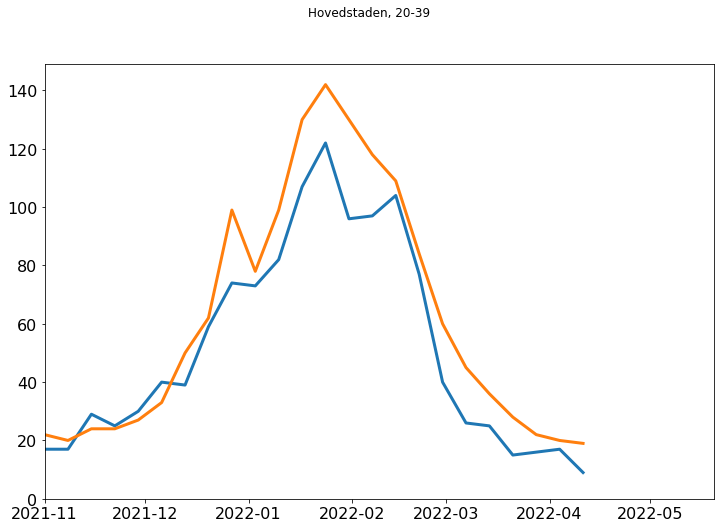

In [264]:
# dfLenReg = dfLen[dfLen.Region == 'Hovedstaden']
curRegion = 'Hovedstaden'
curAge = '00-02'
curAge = '65-79'
# curAge = '80+'
curAge = dfLen.Aldersgruppe.unique()[5]

thisdf = dfLenGr.loc[curRegion].loc[curAge]
fig,ax = plt.subplots()
fig.suptitle(curRegion+', '+curAge)

ax.plot(thisdf.loc['Kort'].index,thisdf.loc['Kort','Antal borgere'])
ax.plot(thisdf.loc['Lang'].index,thisdf.loc['Lang','Antal borgere'])

ax.set_xlim(left=np.datetime64('2021-11-01'))
ax.set_ylim(bottom=0)


# Reconstruct from Regionalt_DB/19_ and 20_

In [ ]:
# list(os.walk(path_dash))[0][1] 

0

In [202]:
latestsubdir = list(os.walk(path_dash))[0][1][-1]
latestdir = path_dash + latestsubdir

curdf = pd.read_csv(latestdir+'/Regionalt_DB/19_indlagte_pr_fnkt_alder_pr_region.csv',encoding='latin-1',delimiter=';')

curDateStr = latestsubdir[-10:]

maindf = curdf.groupby(['Region','Aldersgruppe']).sum().transpose()
maindf['Date'] = curDateStr
maindf.set_index('Date',drop=True,inplace=True)
maindf

for k in range(1,len(list(os.walk(path_dash))[0][1])):
    latestsubdir = list(os.walk(path_dash))[0][1][-k-1]
    latestdir = path_dash + latestsubdir
    curDateStr = latestsubdir[-10:]
    filePath = latestdir+'/Regionalt_DB/19_indlagte_pr_fnkt_alder_pr_region.csv'
    if os.path.exists(filePath):
        nextdf = pd.read_csv(filePath,encoding='latin-1',delimiter=';')

        nextdf = nextdf.groupby(['Region','Aldersgruppe']).sum().transpose()
        nextdf = nextdf.rename(columns={'0-2':'00-02','3-5':'03-05','6-11':'06-11'})
        nextdf['Date'] = curDateStr
        nextdf.set_index('Date',drop=True,inplace=True)


        maindf = pd.concat([maindf,nextdf])
    else:
        continue

In [203]:
# dfAdmAge = maindf.iloc[::-1].diff()
dfAdmAge = maindf.iloc[::-1]
# dfAdmAge
# maindf.iloc[::-1]

Index(['00-02', '03-05', '06-11', '12-15', '16-19', '20-39', '40-64', '65-79',
       '80+'],
      dtype='object', name='Aldersgruppe')


(0.0, 6170.0)

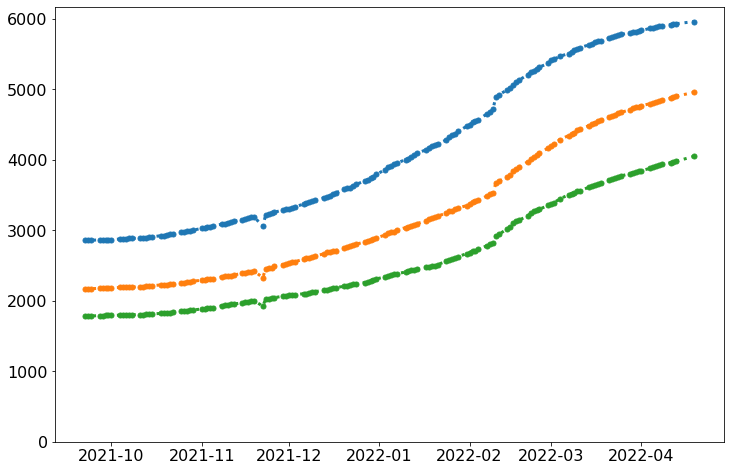

In [204]:
curAdm = dfAdmAge.loc[:,'Hovedstaden']
print(curAdm.columns)
curDates = pd.to_datetime(curAdm.index)

fig,ax = plt.subplots()

ax.plot(curDates,curAdm['40-64'],'.:')
ax.plot(curDates,curAdm['65-79'],'.:')
ax.plot(curDates,curAdm['80+'],'.:')
ax.set_ylim(bottom=0)

In [ ]:
# # Find the latest monday, and go back week for week
# for k in range(0,7):
#     dayToCheck = np.datetime64('today')-np.timedelta64(k,'D')
#     thisWeekDay = (dayToCheck).astype(datetime.datetime).isoweekday()    
#     if (thisWeekDay == 1):
#         latestMonPath = 'SSI_dashboard_'+str(dayToCheck)
#         latestMonday = dayToCheck

# latestMonPath

# df_case = pd.DataFrame()
# df_death = pd.DataFrame()
# # df_death.append(curdf.iloc[1])

# # curMonPath = latestMonPath
# numWeeksBack = 40
# for k in range(numWeeksBack):
#     curMonday = latestMonday - np.timedelta64(k*7,'D')
#     curMonPath = 'SSI_dashboard_'+str(curMonday)
#     curdf = pd.read_csv(path_dash+curMonPath+'/Regionalt_DB/05_bekraeftede_tilfaelde_doede_pr_region_pr_alders_grp.csv',encoding='latin-1',delimiter=';')
#     if 'Aldersgruppe' in curdf.columns:
#         curdf = curdf.groupby('Aldersgruppe').sum().transpose()
#     # if 'Alders gruppe' in curdf.columns:
#     else:
#         curdf = curdf.groupby('Alders gruppe').sum().transpose()

#     rowToAdd = curdf.iloc[1:].copy()
#     rowToAdd['Dato'] = curMonday
#     rowToAddCase = curdf.iloc[:1].copy()
#     rowToAddCase['Dato'] = curMonday

#     df_case = pd.concat([df_case,rowToAddCase])
#     df_death = pd.concat([df_death,rowToAdd])

# df_case_OG = df_case.copy()
# df_death_OG = df_death.copy()

# # Set dato-columns as index
# df_death = df_death.set_index('Dato')
# df_case = df_case.set_index('Dato')

# # Reverse order and get difference instead of cumulative
# df_death = df_death.iloc[::-1].diff()
# df_case = df_case.iloc[::-1].diff()